# Unsupervised Learning: Clustering

## Imports

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

## Using synthetic datasets

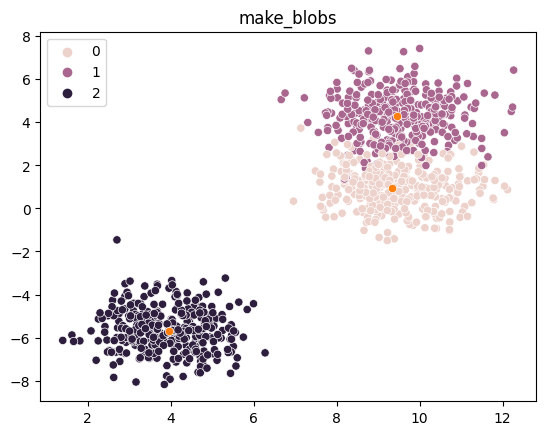

In [3]:
from sklearn.datasets import make_blobs
import seaborn as sns
# make dataset
X, y, centers = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=4, return_centers=True)  # type: ignore
# scatter plot
plt.title("make_blobs")
sns.scatterplot(x=X[:, 0],y=X[:, 1], hue = y)
sns.scatterplot(x=centers[:,0], y= centers[:,1])
plt.show()

In [4]:
# split into train n test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# get k_means algorithm
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42, init='random', max_iter=100, n_init=1, verbose=True, algorithm='lloyd')

# fit and predict
km.fit(X_train)
y_pred = km.predict(X_test)

Initialization complete
Iteration 0, inertia 19289.058531600556.
Iteration 1, inertia 5122.952671011792.
Iteration 2, inertia 1222.9909265121835.
Iteration 3, inertia 1207.6734890242158.
Iteration 4, inertia 1203.1788307130025.
Converged at iteration 4: center shift 0.0010476896472557797 within tolerance 0.0012915220890062484.


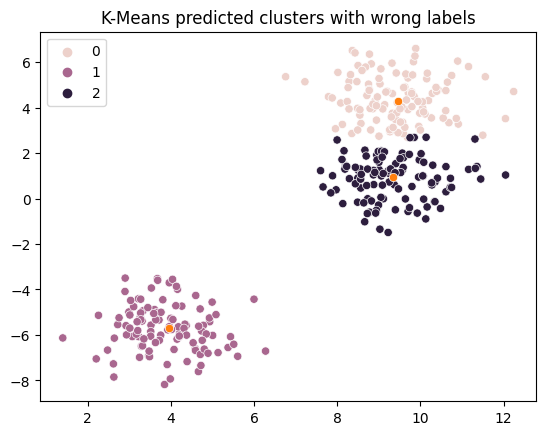

In [5]:
# plot
plt.title('K-Means predicted clusters with wrong labels')
sns.scatterplot(x=X_test[:, 0],y=X_test[:, 1], hue = y_pred)
sns.scatterplot(x=centers[:,0], y= centers[:,1])
plt.show()

In [6]:
# print centers
print("predicted centers: \n",km.cluster_centers_)
print("\nactual centers: \n",centers)

predicted centers: 
 [[ 9.48989953  4.34027122]
 [ 3.90570041 -5.60766833]
 [ 9.56626524  1.02681864]]

actual centers: 
 [[ 9.34059678  0.94464498]
 [ 9.4536872   4.29631987]
 [ 3.95457649 -5.67821009]]


In [7]:
# relabel
mapping = {0: 1, 1: 2, 2: 0}
y_pred = [mapping[label] for label in y_pred]

# accuracy
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.9666666666666667


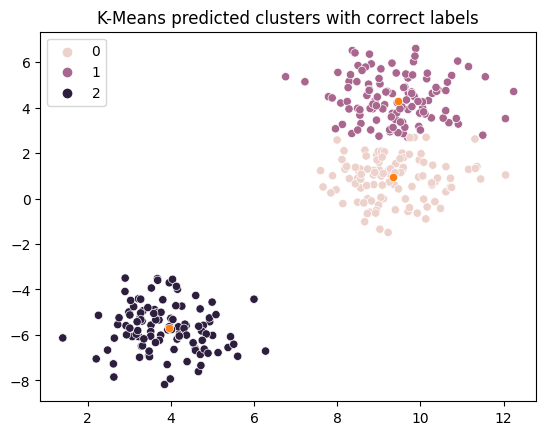

In [8]:
# plot
plt.title('K-Means predicted clusters with correct labels')
sns.scatterplot(x=X_test[:, 0],y=X_test[:, 1], hue = y_pred)
sns.scatterplot(x=centers[:,0], y= centers[:,1])
plt.show()

## Customer Segmentation Dataset
<img src="/images/new/cust.png" alt="customer segmentation shown with pie chart" width="600" height="300">


Reference:           
- [Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data)           
- [Notebook](https://www.kaggle.com/code/niteshyadav3103/customer-segmentation-using-kmeans-hc-dbscan)

### Get Dataset

In [9]:
cust = pd.read_csv("datasets/customer/cust.csv")
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Data Cleaning

In [11]:
# check for null values
print("Check for Null values: \n",cust.isnull().sum())

Check for Null values: 
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [12]:
# check duplicates
print("Check for duplicates: \n",cust.duplicated().sum())

Check for duplicates: 
 0


### Exploratory Data Analysis

Histograms

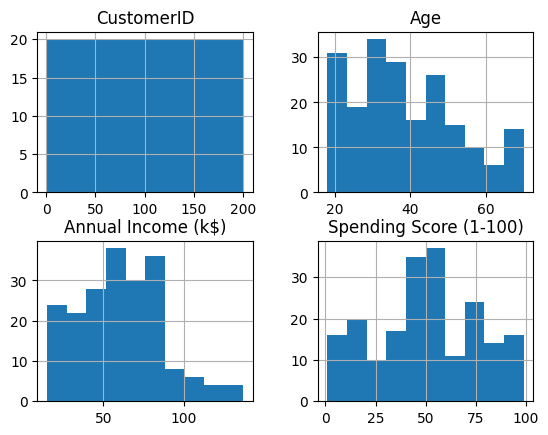

In [13]:
# create a copy of data
X = cust.copy()

# hist
X.hist()
plt.show()

We see that Customer ID has no significance in the dataset, so we drop it.
Also, The data needs scaling.
The Gender Feature is not displayed because its a categorical feature.

Gender Value Counts Bar Plot

Gender
Female    112
Male       88
Name: count, dtype: int64


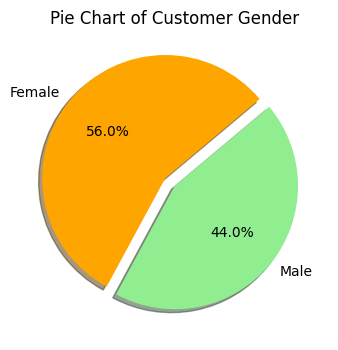

In [14]:
# get value counts
val_cnt = pd.value_counts(X["Gender"])
print(val_cnt)

# plot
plt.figure(figsize=(4,4))
plt.title("Pie Chart of Customer Gender")
plt.pie(val_cnt, labels=["Female","Male"], autopct='%1.1f%%', 
        shadow=True, colors=["orange","lightgreen"], explode=[0.1,0], startangle=40)
plt.show()

Scatter Plots

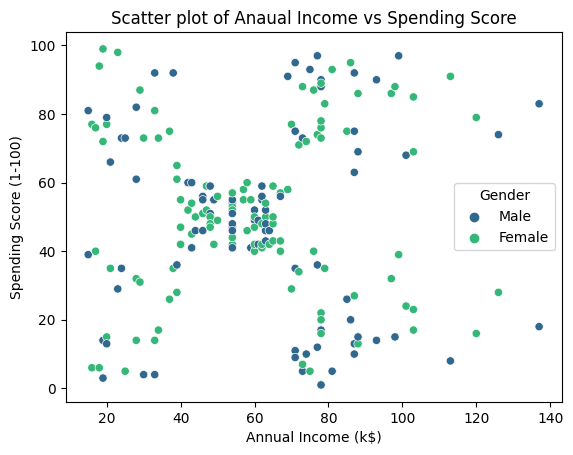

In [15]:
# plot annual income vs spending score
plt.title("Scatter plot of Anaual Income vs Spending Score")
sns.scatterplot(x= X["Annual Income (k$)"], y=X["Spending Score (1-100)"], 
                hue = X["Gender"], palette= "viridis")
plt.show()

We can clearly see that the customers can segmented into atleast 5 clusters depending on their Annual Income and Spending Score.

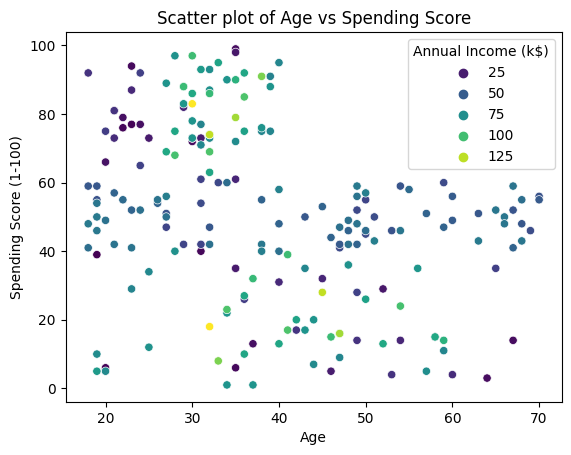

In [16]:
# plot age vs spending score
plt.title("Scatter plot of Age vs Spending Score")
sns.scatterplot(x= X["Age"], y=X["Spending Score (1-100)"],
                hue=X["Annual Income (k$)"], palette="viridis")
plt.show()

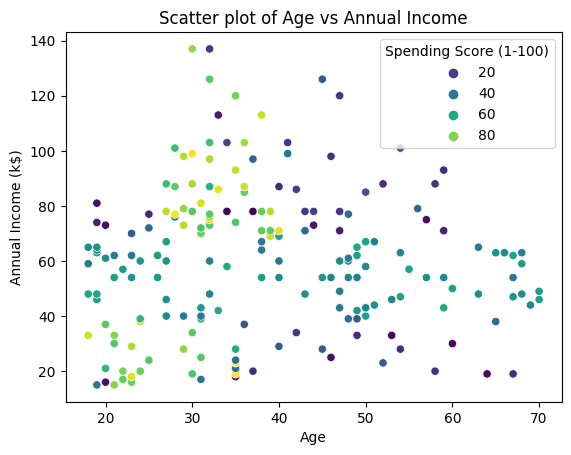

In [17]:
# plot age vs annual income
plt.title("Scatter plot of Age vs Annual Income")
sns.scatterplot(x= X["Age"], y=X["Annual Income (k$)"],
                hue=X["Spending Score (1-100)"], palette="viridis")
plt.show()

Clusters can be formed based on these other graphs also.

### Data Tranformations
1. Customer ID needs to be dropped.
2. We notice that gender feature is categorical, use label encoder to convert to numerical.
3. Scale the data to a common scale.

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# drop Customer ID
X.drop("CustomerID", axis=1, inplace=True)

# label encode
encoder = LabelEncoder()
X["Gender"] = encoder.fit_transform(X["Gender"])

# scale
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# print transformed data
X = pd.DataFrame(X, columns=cust.columns.drop("CustomerID"))
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


### K-Means Clustering

Cost Function: Inertia is a metric used to evaluate the quality of a clustering algorithm, particularly the K-means algorithm. It measures the sum of squared distances between each data point and its assigned centroid. In other words, it measures how far the data points are from their assigned cluster centers.

The K-means algorithm tries to minimize the inertia by iteratively updating the cluster centers until the inertia cannot be reduced any further. A lower inertia value indicates that the clusters are more compact and well-separated, while a higher inertia value indicates that the clusters are more spread out and overlapping.

In [19]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
class PerformKMeans:

    def __init__(self, X) -> None:
        self.X = X
        
    def get_cost_func(self, fit_cols, no_k = 10):

        # record inertia values in a list
        cost_function_values = []
        for k in range(1,no_k+1):
            # get k_means algorithm
            km = KMeans(n_clusters=k, init='random', max_iter=100, n_init=1, 
                    algorithm = 'lloyd', verbose=False, random_state=42)
            
            # fit
            dataset = self.X.loc[:,fit_cols]
            km.fit_predict(dataset)
            
            # get inertia
            inertia = km.inertia_
            cost_function_values.append(inertia)
            
        return cost_function_values
    
    def elbow_plot(self, cols, knos=10):
        cost_function = self.get_cost_func(cols, knos)
        plt.figure(figsize=(7,4))
        if len(cols) == 3:
            plt.title("Elbow plot for kmeans with {} , {}, {} columns".format(cols[0], cols[1], cols[2]))
        else:
            plt.title("Elbow plot for kmeans with {} and {}".format(cols[0],cols[1]))
        plt.plot(range(1,knos+1), cost_function, marker='o', linewidth=2, markersize=5)
        plt.xlabel("Number of clusters")
        plt.ylabel("Cost function")
        plt.grid()
        plt.show()
    
    def plot_clusters(self, fit_cols, k=5):

        if len(fit_cols) != 2:
            raise Exception("clusters can be plotted only for 2 features using this fucntion")

        # get k_means algorithm
        km = KMeans(n_clusters=k, init='random', max_iter=100, n_init=1, 
                    algorithm = 'lloyd', verbose=False, random_state=42)
            
        # fit
        dataset = self.X.loc[:,fit_cols]
        labels = km.fit_predict(dataset)
        centers = km.cluster_centers_

        # plot
        import matplotlib.pyplot as plt
        plt.title("Scatter plot for kmeans with {} vs {}".format(fit_cols[0],fit_cols[1]))
        sns.scatterplot(x= self.X.loc[:,fit_cols[0]], y= self.X.loc[:,fit_cols[1]], 
                hue = labels, palette= "viridis")
        sns.scatterplot(x=centers[:,0], y=centers[:,1], color = 'red')
        plt.show()

  

In [20]:
pkm = PerformKMeans(X)
feature_set1 = X.columns.drop(["Age","Gender"])
feature_set2 = X.columns.drop(["Gender", "Spending Score (1-100)"])
feature_set3 = X.columns.drop(["Gender", "Annual Income (k$)"])
feature_set4 = X.columns.drop(["Gender"])

#### Clustering-1:
According to Annual Income and Spending Score

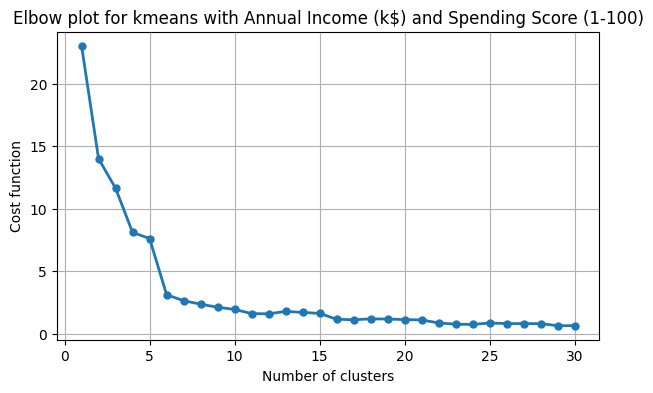

In [21]:
pkm.elbow_plot(feature_set1, knos=30)

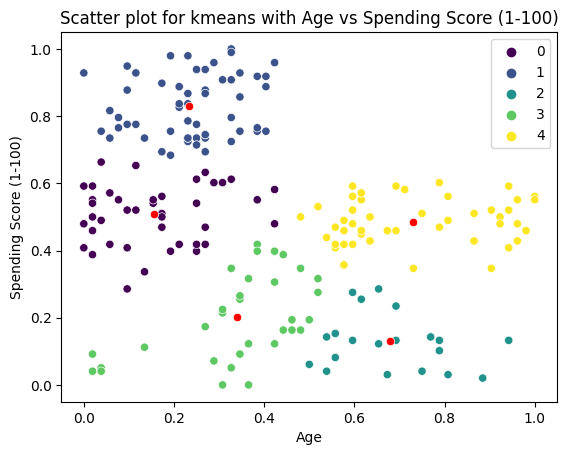

In [22]:
pkm.plot_clusters(feature_set3, k=5)

#### Clustering-2:
According to Age and Spending Score

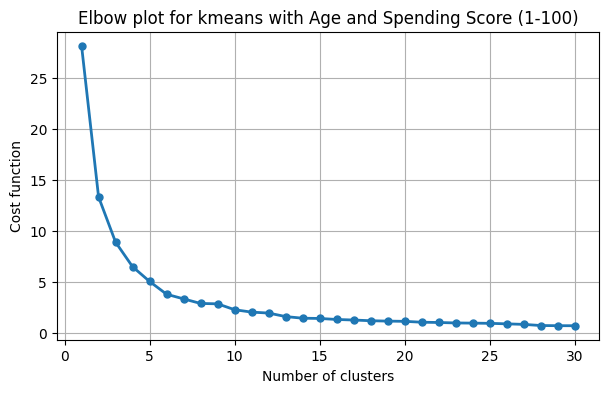

In [23]:
pkm.elbow_plot(feature_set3, knos=30)

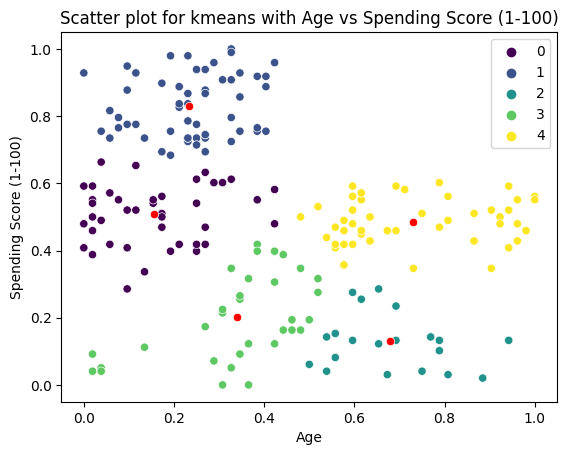

In [24]:
pkm.plot_clusters(feature_set3, k=5)

#### Clustering-3:
According to Age, Annual Income 

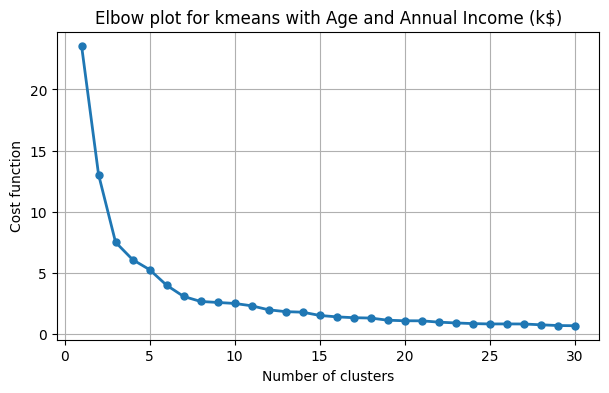

In [25]:
pkm.elbow_plot(feature_set2, knos=30)

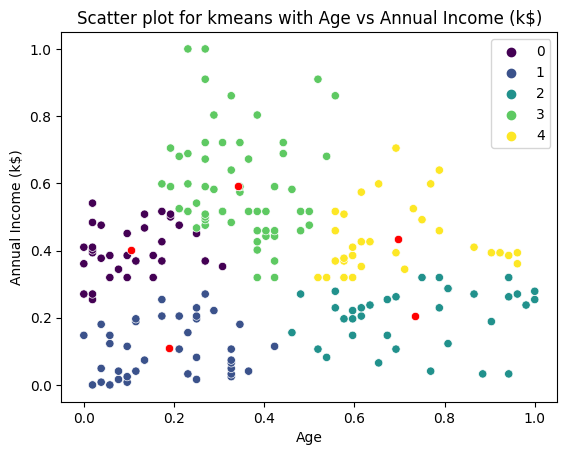

In [26]:
pkm.plot_clusters(feature_set2, k=5)

#### Clustering-4:
According to Age, Annual Income and Spending Score (3D plot)

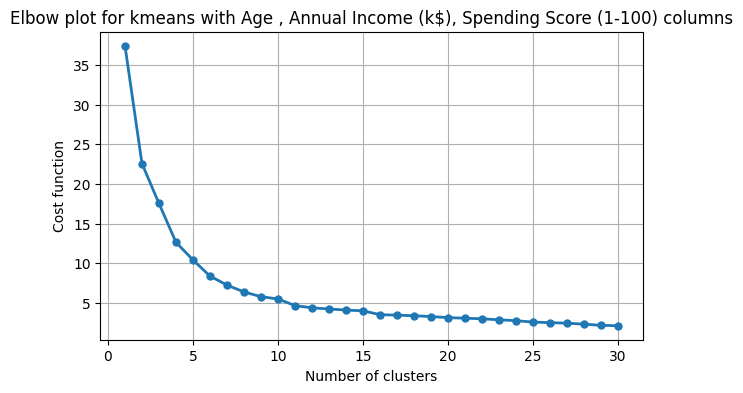

In [27]:
pkm.elbow_plot(feature_set4, knos=30)

In [28]:
km = KMeans(n_clusters=5, init='random', max_iter=100, n_init=1, 
                    algorithm = 'lloyd', verbose=False, random_state=42)

# fit
dataset = X.loc[:,feature_set4]
labels = km.fit_predict(dataset)
centers = km.cluster_centers_
inertia = km.inertia_

# print results
print("inertia: ", inertia)
print("centers: \n", centers)

inertia:  10.430323890221665
centers: 
 [[0.28605769 0.58278689 0.82168367]
 [0.13817664 0.21387371 0.62490552]
 [0.54326923 0.09631148 0.17704082]
 [0.42067308 0.57745902 0.19260204]
 [0.73035117 0.32181041 0.49023957]]


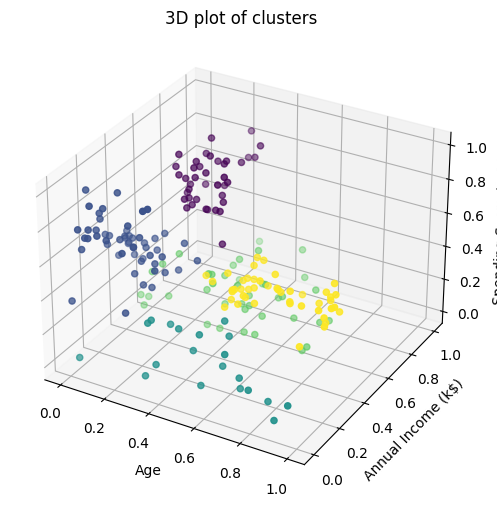

In [29]:
# plot 3D Cluster
from mpl_toolkits.mplot3d import Axes3D

# assume X is your data and y_pred is the cluster labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.title.set_text("3D plot of clusters")
ax.scatter3D(X.iloc[:, 1], X.iloc[:, 2], X.iloc[:, 3], c=labels)
ax.set_xlabel(X.columns[1])
ax.set_ylabel(X.columns[2])
ax.set_zlabel(X.columns[3])
plt.show()

Therefore, we can conclude that the best clustering is the one with 5 clusters, according to Annual Income and Spending Score.           
The End.